In [ ]:
# Import les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### **Preprocessing**

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Projet Solvabilité Client/train_u6lujuX_CVtuZ9i.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
pd.set_option('display.max_rows', df.shape[0]+1)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.dtypes.value_counts()

object     8
float64    4
int64      1
Name: count, dtype: int64

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

###***Les valeurs manquantes*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
(df.isna().sum()/ df.shape[0]).sort_values(ascending=True)

Loan_ID              0.000000
Education            0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Property_Area        0.000000
Loan_Status          0.000000
Married              0.004886
Gender               0.021173
Loan_Amount_Term     0.022801
Dependents           0.024430
LoanAmount           0.035831
Self_Employed        0.052117
Credit_History       0.081433
dtype: float64

<Axes: >

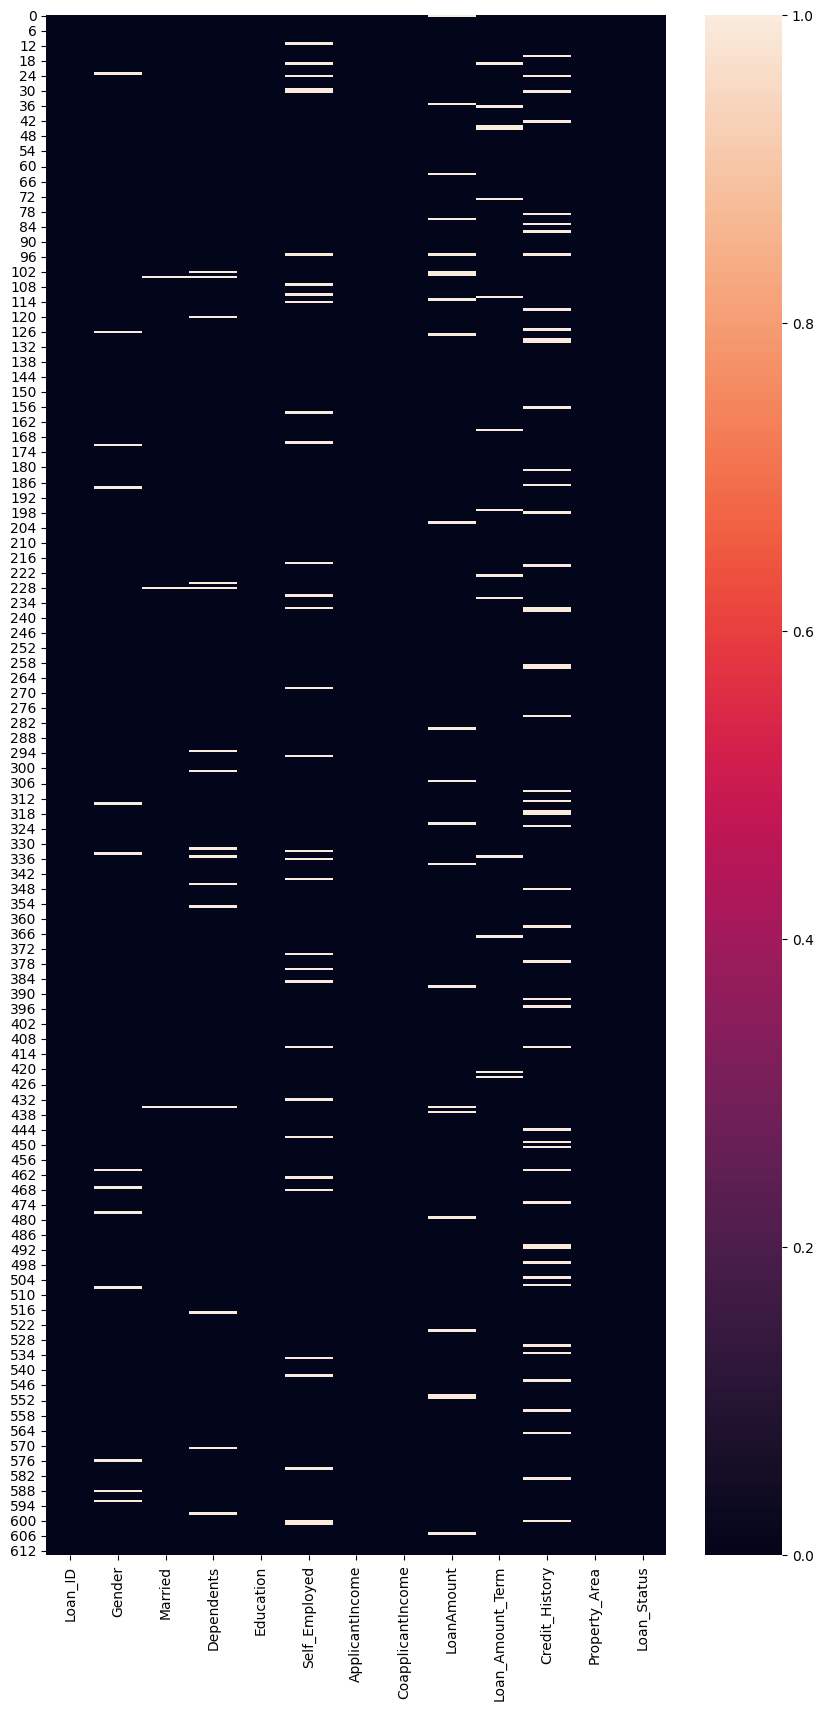

In [ ]:
plt.figure(figsize=(10, 20))
sns.heatmap(df.isna())

In [ ]:
df.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Renseigner les valeurs manquantes

cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
  if c==object:
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])


cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()

In [ ]:
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [ ]:
#Pour les variables categoriques , on va remplacer les valeurs manquantes par les plus frequentes

cat_data=cat_data.fillna(cat_data.mode().iloc[0])

In [ ]:
cat_data.isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [ ]:
#Pour les variables numeriques, on va remplacer les valeurs manaquantes par la valeur precedente de la meme colonne
num_data.fillna(method='bfill',inplace=True)

In [ ]:
num_data.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

<Axes: xlabel='Loan_Status'>

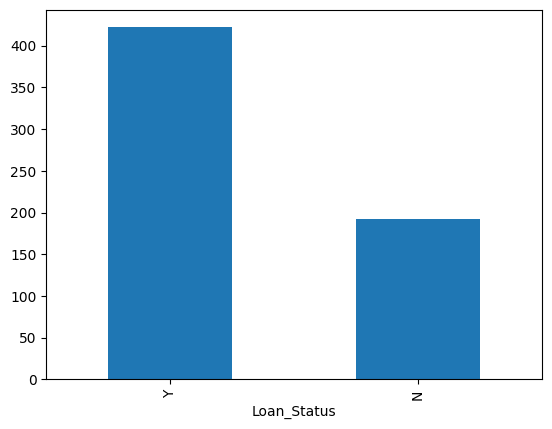

In [ ]:
df["Loan_Status"].value_counts().plot(kind='bar')

In [ ]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
#Transformer la colonne target
target_value={"Y":1,"N":0}
target=cat_data["Loan_Status"]
cat_data.drop("Loan_Status",axis=1,inplace=True)
target=target.map(target_value)

In [ ]:
target.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_data.columns:
  cat_data[i]=le.fit_transform(cat_data[i])

In [ ]:
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2


In [ ]:
#Supprimer la colonne Loan_ID

cat_data.drop("Loan_ID",axis=1,inplace=True)

In [ ]:
#Concater num_data et cat_data et specifier la colonne target
X=pd.concat([num_data,cat_data],axis=1)
y=target

In [ ]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5849.0,0.0,128.0,360.0,1.0,1,0,0,0,0,2
1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,1,0,0,1,2
3,2583.0,2358.0,120.0,360.0,1.0,1,1,0,1,0,2
4,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,2


In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

### **Exploratory Data Analysis**


In [ ]:
# La base de  donnes utilise pour le EDA
df=pd.concat([num_data,cat_data,target],axis=1)

In [ ]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849.0,0.0,128.0,360.0,1.0,1,0,0,0,0,2,1
1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,1,0,0,1,2,1
3,2583.0,2358.0,120.0,360.0,1.0,1,1,0,1,0,2,1
4,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,2,1


<Axes: ylabel='proportion'>

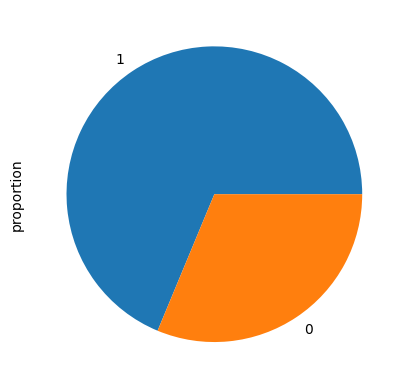

In [ ]:
# Commencer par la variable cible
target.value_counts(normalize=True).plot.pie()

Le pourcentage des crédits accordés est :0.3127035830618892
Le pourcentage des crédits refusés est :0.6872964169381107


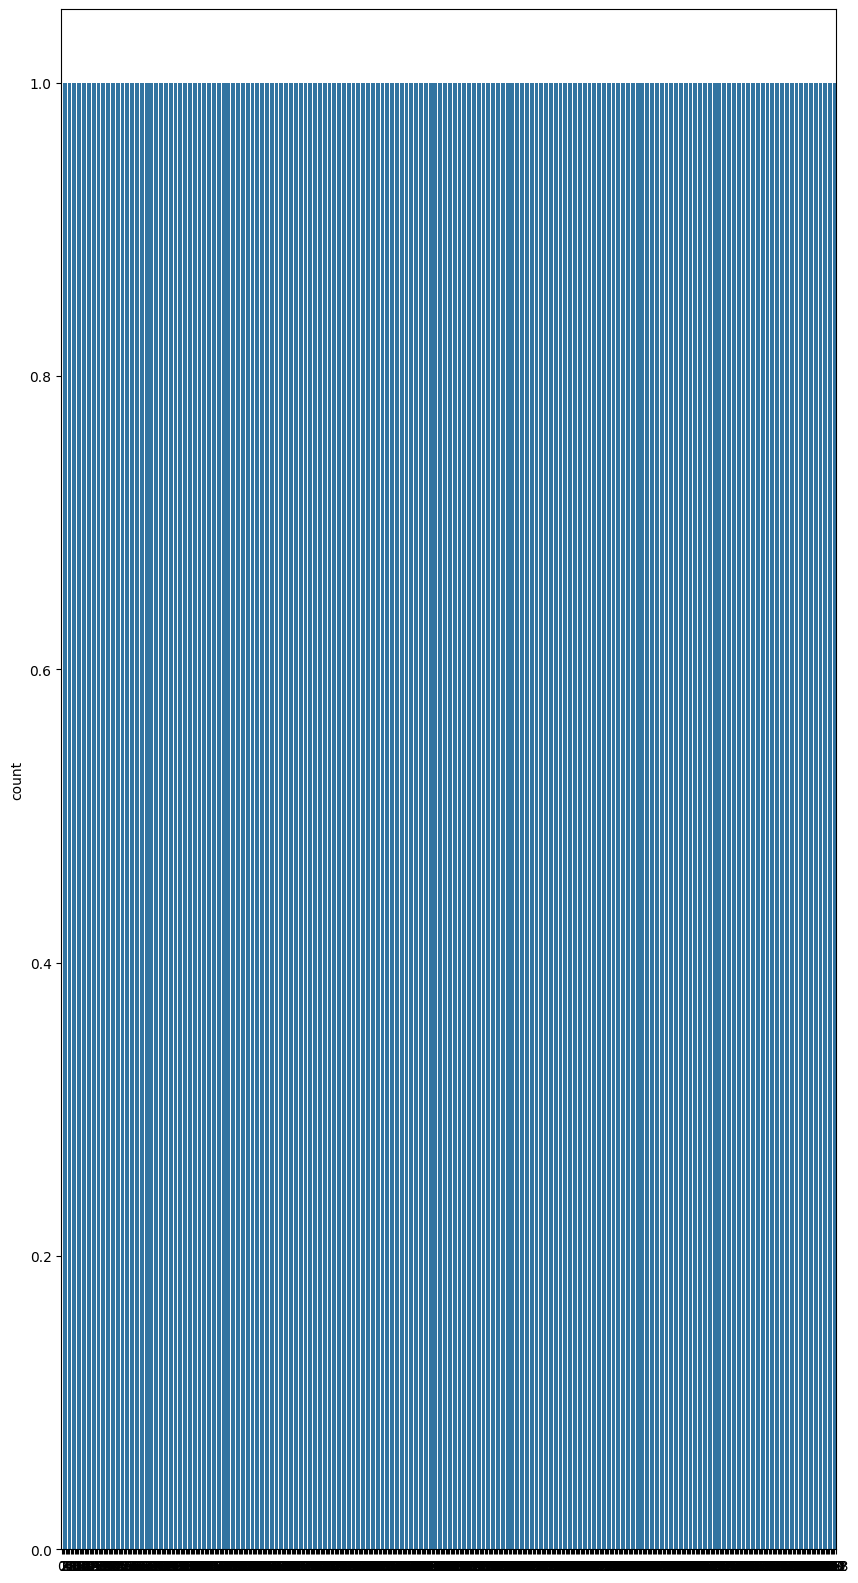

In [ ]:
plt.figure(figsize=(10, 20))
sns.countplot(df['Loan_Status'])
yes=target.value_counts()[0]/len(target)
no=target.value_counts()[1]/len(target)
print(f'Le pourcentage des crédits accordés est :{yes}')
print(f'Le pourcentage des crédits refusés est :{no}')


###**Relation entre variables cat /Target**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


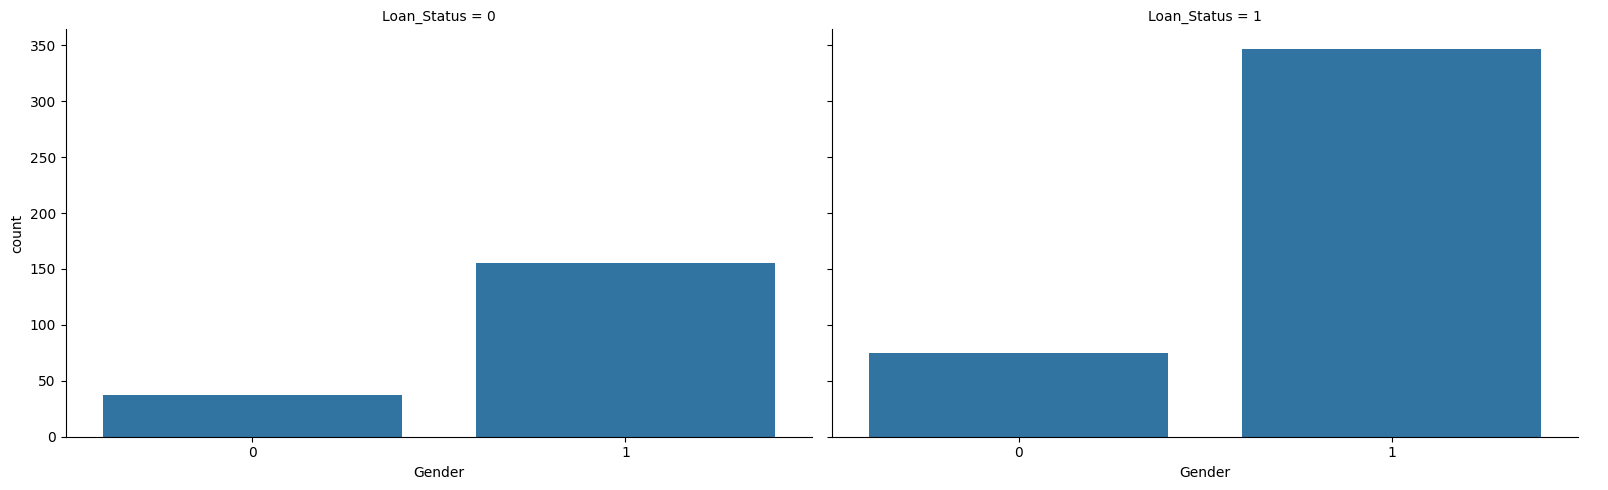

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


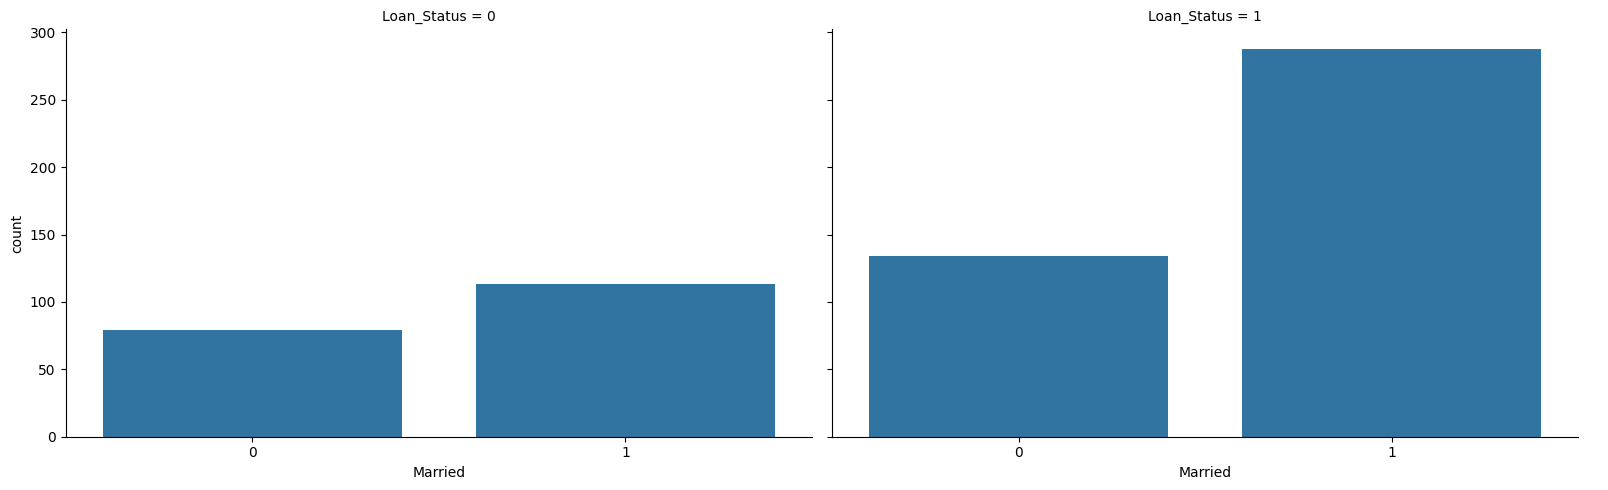

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


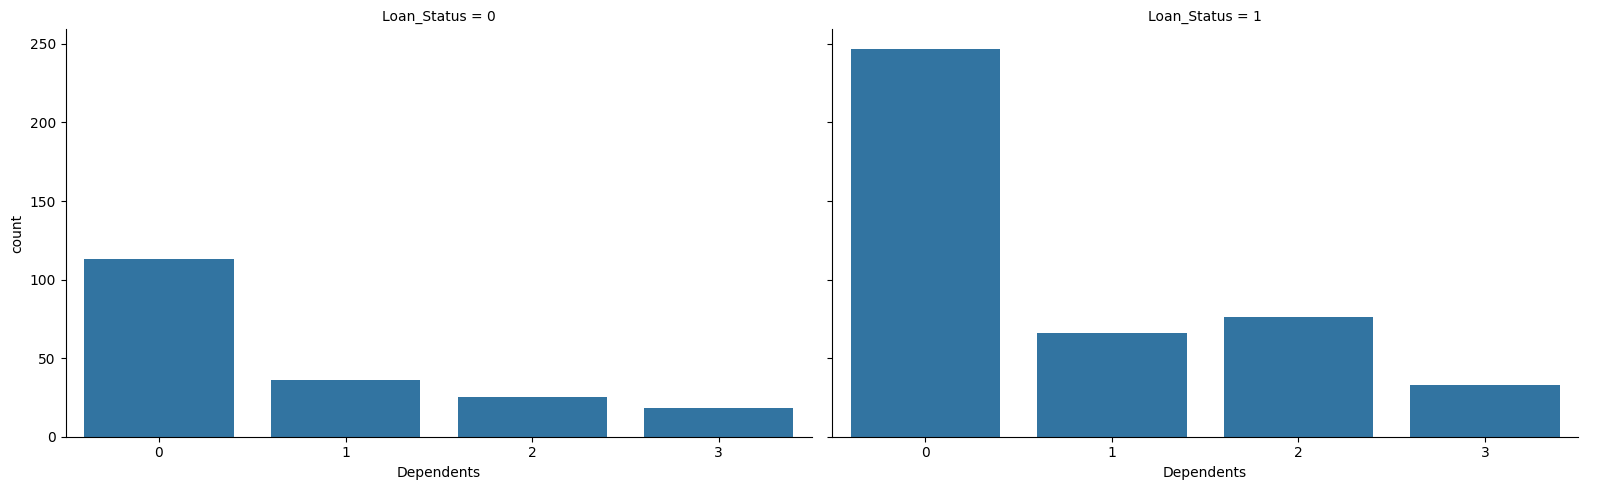

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


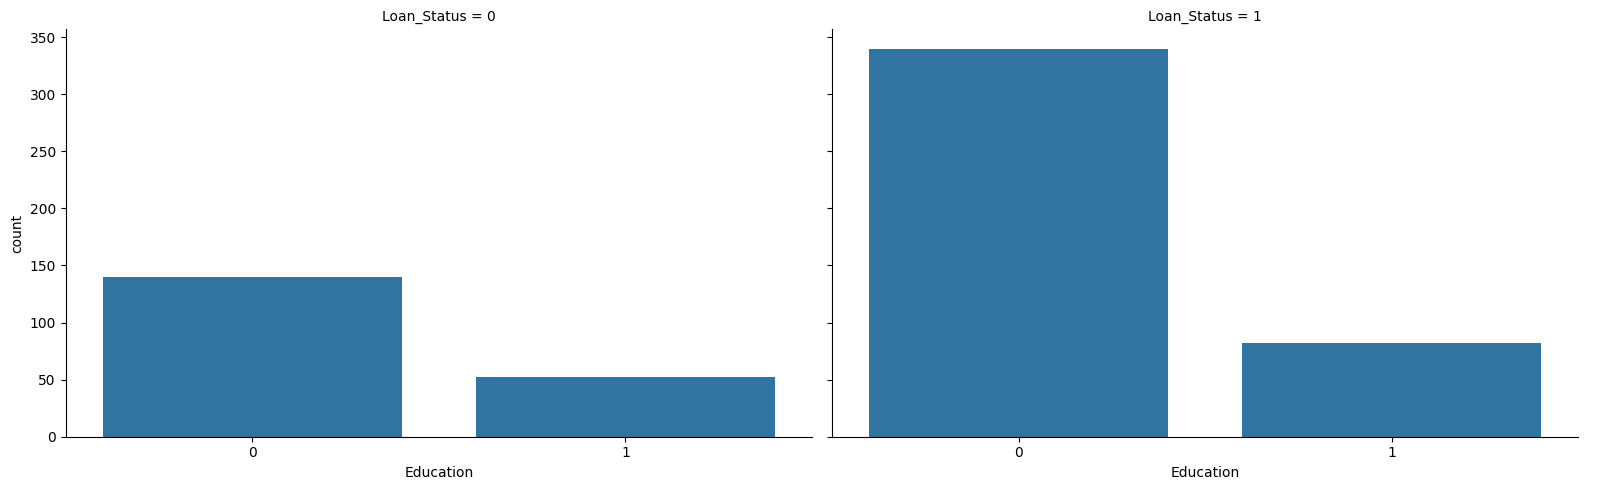

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


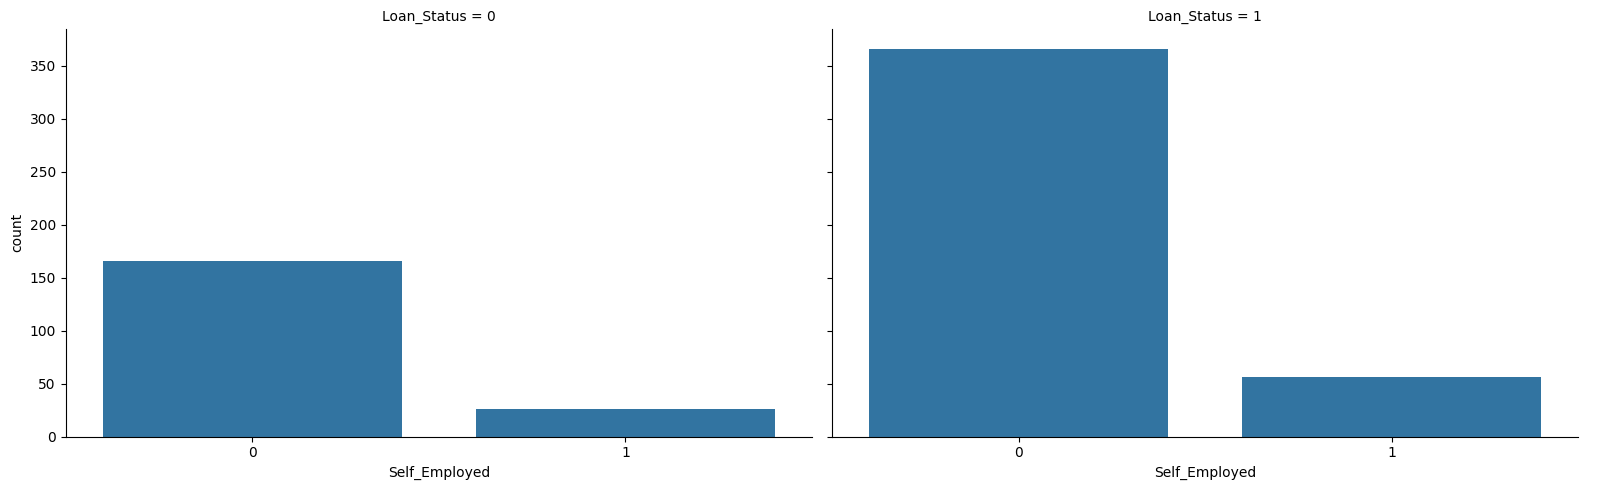

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


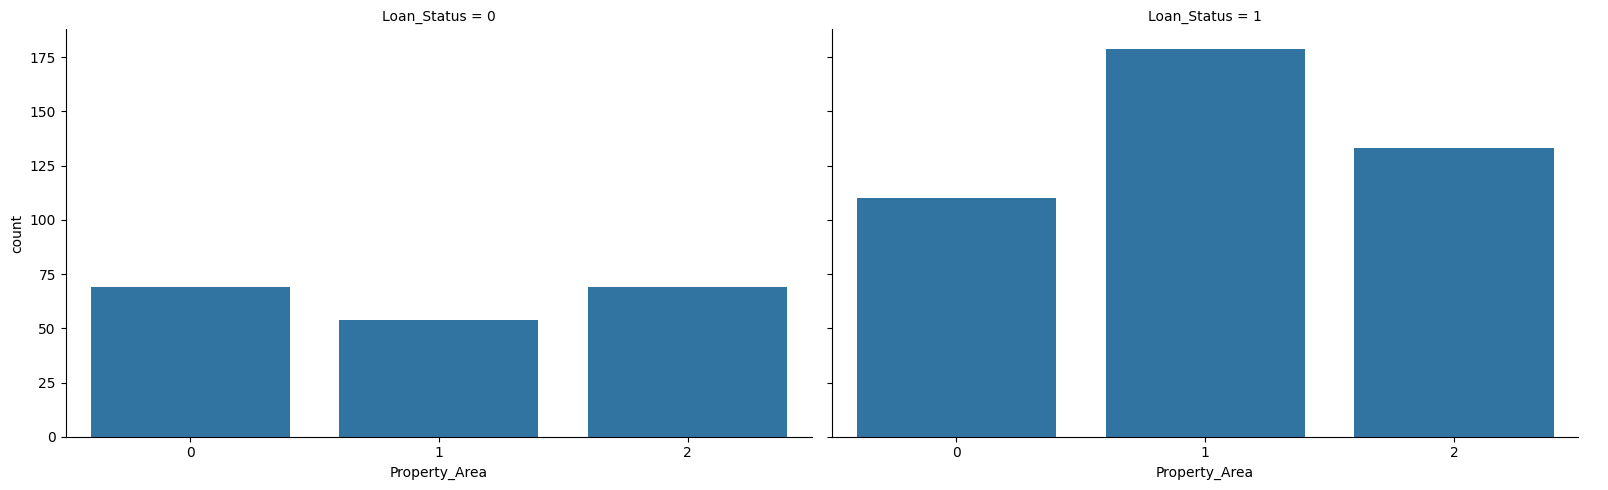

In [ ]:
#Relation entre les variables categorielles et Loan_status

for i in cat_data.columns:
  grid= sns.FacetGrid(df,col='Loan_Status',height=5,aspect=1.6)
  grid.map(sns.countplot,i).add_legend()
  plt.show()

###**Relation entre variables cat /Target**

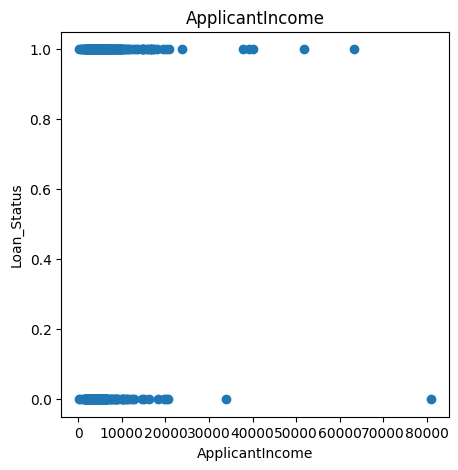

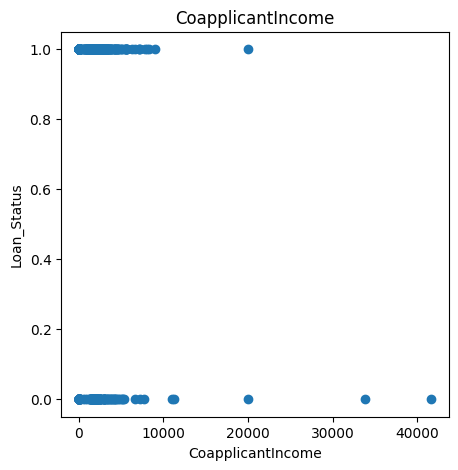

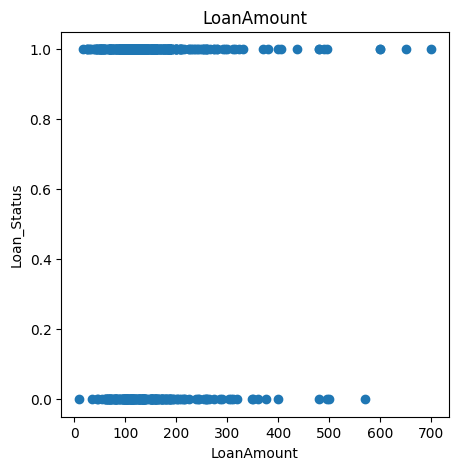

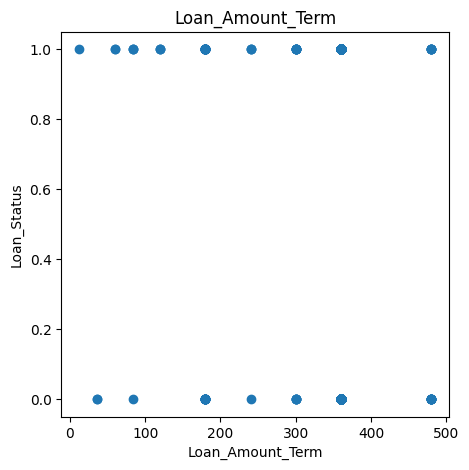

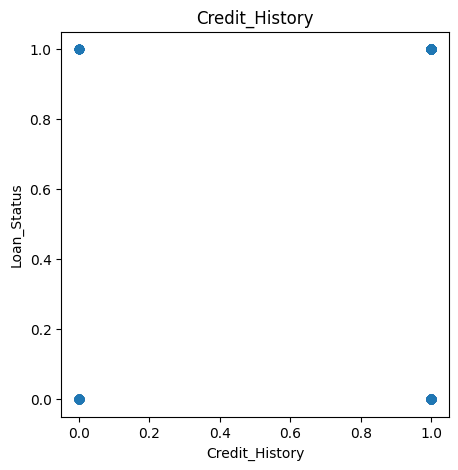

In [ ]:
# Revenu du demandeur
for i in num_data.columns:
  plt.figure(figsize=(5,5))
  plt.scatter(df[i],df['Loan_Status'])
  plt.xlabel(i)
  plt.ylabel('Loan_Status')
  plt.title(i)
  plt.show()

In [ ]:
df.groupby('Loan_Status').median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
Loan_Status,,,,,,,,,,,
0,3833.5,268.0,132.5,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
1,3812.5,1239.5,127.5,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


### Modeling###

In [ ]:
#Diviser notre données en données d'entrainement et de test
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(X,y):
  X_train,X_test=X.iloc[train],X.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]

print("La taille de X_train",X_train.shape)
print("La taille de X_test",X_test.shape)
print("La taille de y_train",y_train.shape)
print("La taille de y_test",y_test.shape)

La taille de X_train (491, 11)
La taille de X_test (123, 11)
La taille de y_train (491,)
La taille de y_test (123,)


In [ ]:
#On va appliquer trois algorithmes Logistic Regression,KNN,Decision Tree

models={"LogisticRegression":LogisticRegression(random_state=42),
        "KNeighborsClassifier":KNeighborsClassifier(),
        "DecisionTreeClassifier":DecisionTreeClassifier(max_depth=1,random_state=42)}

#La fonction de precision

def accu(y_true,y_pred,retu=False):
  if retu:
    return accuracy_score(y_true,y_pred)

  else:
    print(f'Accuracy Score: {accuracy_score(y_true,y_pred)*100:.2f}%')


#La fonction d'application des modèles

def train_test_eval(models,X_train,X_test,y_train,y_test):
  for name,model in models.items():
    print(name,':')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accu(y_test,y_pred,retu= False)
   # print(confusion_matrix(y_test,y_pred)
   # print(classification_report(y_test,y_pred))
    print('-'*30)

train_test_eval(models,X_train,X_test,y_train,y_test)


LogisticRegression :
Accuracy Score: 85.37%
------------------------------
KNeighborsClassifier :
Accuracy Score: 65.04%
------------------------------
DecisionTreeClassifier :
Accuracy Score: 84.55%
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X_2=X[["Credit_History","Gender","Married","CoapplicantIncome","ApplicantIncome"]]


In [ ]:
#Diviser notre données en données d'entrainement et de test
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(X_2,y):
  X_train,X_test=X_2.iloc[train],X_2.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]

print("La taille de X_train",X_train.shape)
print("La taille de X_test",X_test.shape)
print("La taille de y_train",y_train.shape)
print("La taille de y_test",y_test.shape)

La taille de X_train (491, 5)
La taille de X_test (123, 5)
La taille de y_train (491,)
La taille de y_test (123,)


In [ ]:
train_test_eval(models,X_train,X_test,y_train,y_test)

LogisticRegression :
Accuracy Score: 85.37%
------------------------------
KNeighborsClassifier :
Accuracy Score: 65.85%
------------------------------
DecisionTreeClassifier :
Accuracy Score: 84.55%
------------------------------


In [ ]:
#Appliquer la regression Logistique sur notrre dataset
Classifier=LogisticRegression(random_state=42)
Classifier.fit(X_2,y)


LogisticRegression(random_state=42)

In [ ]:
#Enregistrer le model pour le deployement
pickle.dump(Classifier,open('model.pkl','wb'))

In [ ]:
X_2.columns

Index(['Credit_History', 'Gender', 'Married', 'CoapplicantIncome',
       'ApplicantIncome'],
      dtype='object')